In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [28]:
data = pd.read_csv('../Datasets/apples_and_oranges.csv')
data.head()
print(data.shape)

(40, 3)


In [31]:
training_set, test_set = train_test_split(data,test_size=0.4, random_state=1)
print('training_set: ',training_set.shape)
print('testing_set: ',test_set.shape)

training_set:  (24, 3)
testing_set:  (16, 3)


In [32]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24, 2)
(16, 2)
(24,)
(16,)


In [33]:
classifier = SVC(kernel='rbf',random_state=1)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [34]:
test_set["Predeictions"] = Y_pred

In [35]:
Y_test_pred = classifier.predict([[69.0,4.39]])
Y_test_pred

array(['orange'], dtype=object)

In [36]:
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.4375


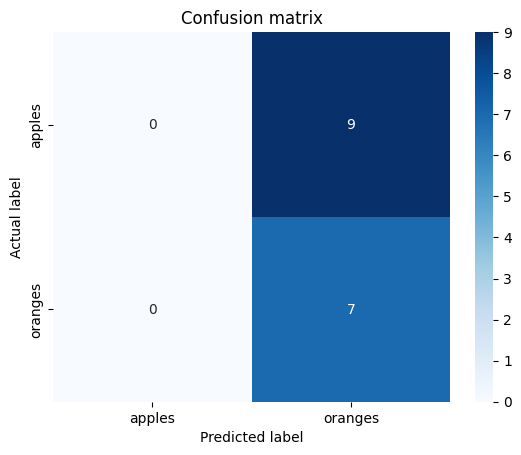

In [40]:
import seaborn as sns

def plot_cm(cm):
    cm_plot_labels = ['apples','oranges']
    confusion_matrix(y_true=Y_test,y_pred=Y_pred)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=cm_plot_labels,yticklabels=cm_plot_labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion matrix')
    plt.show()


plot_cm(cm)

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_12968\2971059599.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)


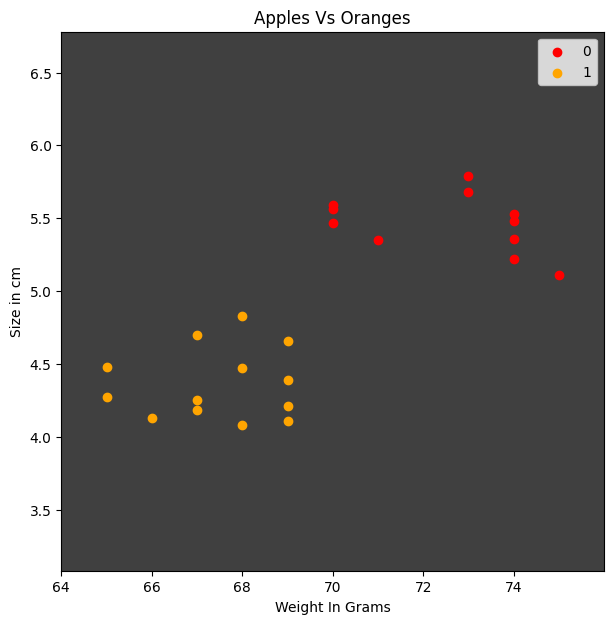

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_12968\3582124961.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)


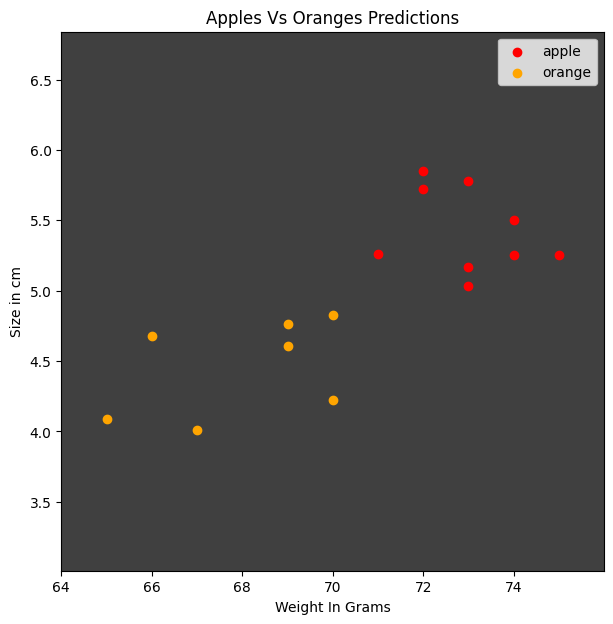

In [39]:
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()